**Welcome to your first assignment of Summer Analytics 2023! We hope you are excited to implement and test everything you have learnt up until now.<a href = "https://drive.google.com/file/d/1U73P58VAc4EXM98Or9feKnVx9I9FOP_L/view?usp=sharing"> The dataset</a> which you'll use includes information about Movies.**

 We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!
 
Let's get started with importing numpy, pandas, seaborn and matplotlib! 

Note - matplotlib should be imported with the command :

**import matplotlib.pyplot as plt**

Start by importing all important libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read the csv file and assign it to a variable .

In [141]:
movie = pd.read_csv('/Users/himeshagrawal/Summer analytics/imdb_top_1000.csv')
movie.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Display shape of dataframe

In [133]:
movie.shape

(999, 14)

Print all columns of dataframe

In [7]:
movie.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

Remove the column 'Poster_Link' and update the dataframe.

In [8]:
movie.drop('Poster_Link',axis = 1,inplace = True)

Set the 'Series_Title' column as the index of dataframe

In [9]:
movie.set_index('Series_Title',inplace=True)

Print a list of all the unique Genre

In [140]:
temp2 = movie.Genre.str.replace(' ','')
movie = movie.assign(Genre=temp2)
ls_Genre = movie.Genre.str.get_dummies(sep=',')
print(ls_Genre.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


1. What is the Number of Directors in the given dataset ? 

In [11]:
# print(movie.Director.str.get_dummies(sep=',').columns.unique().shape[0])(In case they more than one director)
print(movie.Director.unique().shape[0])

548


2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [12]:
print('Mean is '+ movie.IMDB_Rating.mean().astype(str))
print('Medain is '+ movie.IMDB_Rating.median().astype(str))
print('Standard Deviation is '+ movie.IMDB_Rating.std().astype(str))


Mean is 7.949299999999999
Medain is 7.9
Standard Deviation is 0.2754912074920095


3. Which director has directed the most number of movies?

In [13]:
print(movie.Director.describe()['top'])

Alfred Hitchcock


4. Name the Movie which has the highest Runtime ?

In [14]:
print(movie.Runtime.str.replace(' min','').astype(int).idxmax())

Gangs of Wasseypur


5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [15]:
movie.Released_Year.value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: count, Length: 100, dtype: int64

In [16]:
# As their one row with 'PG' in Released_Year We have to remove it.
rem = movie[movie.Released_Year=='PG'].index
movie.drop(rem,axis=0,inplace=True)

In [17]:
#changing data type of Released_Year
movie.Released_Year = movie.Released_Year.astype(int)
print(movie[(movie.Released_Year>2000) & (movie.IMDB_Rating>8.5)].shape[0])

11


Using seaborn make different types of plots, observe the trend and answer the questions.
6. Make a countplot of Movies directed by top 5 directors.

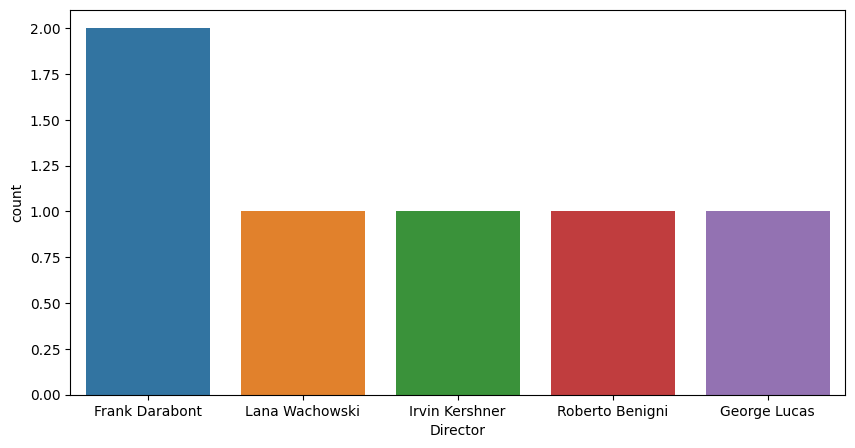

In [168]:
# Top 5 Directors(Based on Average IMDB_Rating)
Top5 = movie.groupby('Director').IMDB_Rating.mean().sort_values(ascending=False).head(5).index

new5 = movie[(movie.Director==Top5[0])|(movie.Director==Top5[1])|(movie.Director==Top5[2])|(movie.Director==Top5[3])|(movie.Director==Top5[4])]

plt.figure(figsize=(10,5))
sns.countplot(x='Director',data=new5);

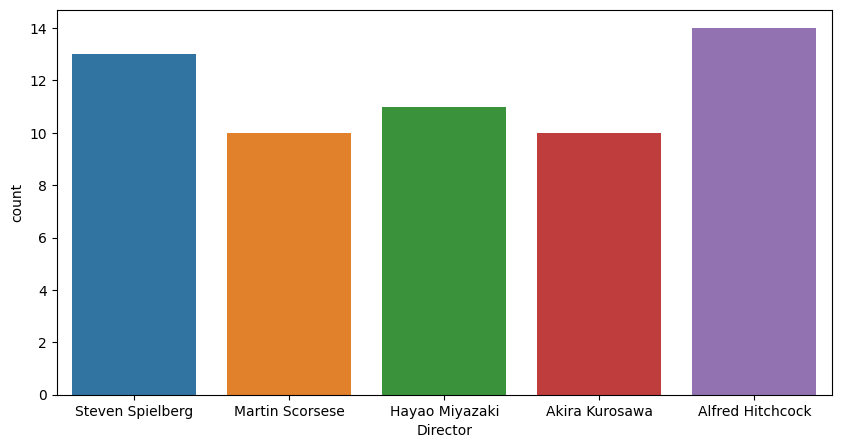

In [19]:
# Top 5 Directors(Based on No. of movie)
Top5 = movie.Director.value_counts().head(5).index

new5 = movie[(movie.Director==Top5[0])|(movie.Director==Top5[1])|(movie.Director==Top5[2])|(movie.Director==Top5[3])|(movie.Director==Top5[4])]

plt.figure(figsize=(10,5))
sns.countplot(x='Director',data=new5);

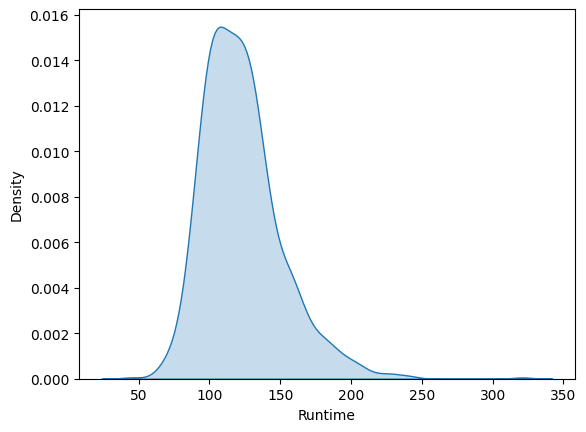

In [20]:
movie.Runtime = movie.Runtime.str.replace(' min','').astype(int)
sns.kdeplot(movie.Runtime,fill = True);


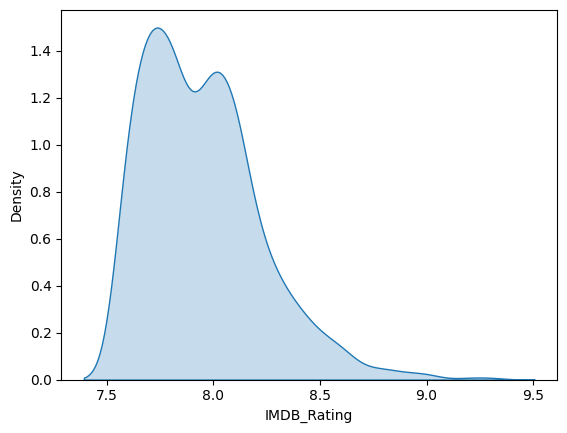

In [21]:
sns.kdeplot(movie.IMDB_Rating,fill = True);

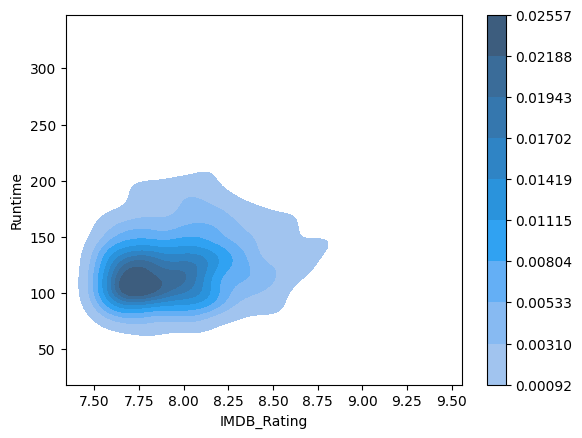

In [22]:
sns.kdeplot(data = movie,x='IMDB_Rating',y='Runtime',fill=True,cbar=True);

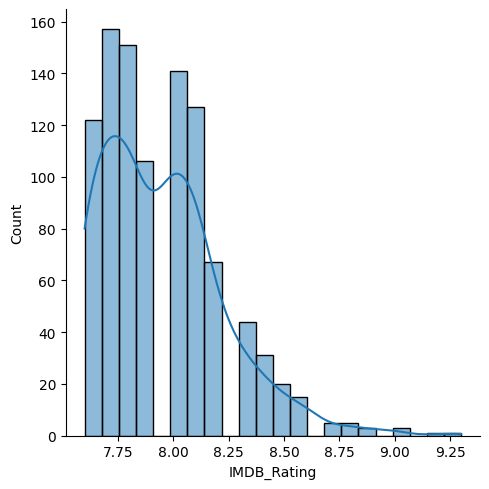

In [23]:
sns.displot(movie.IMDB_Rating,kde=True);

7. Make a plot to analyze distribution of IMDB rating?

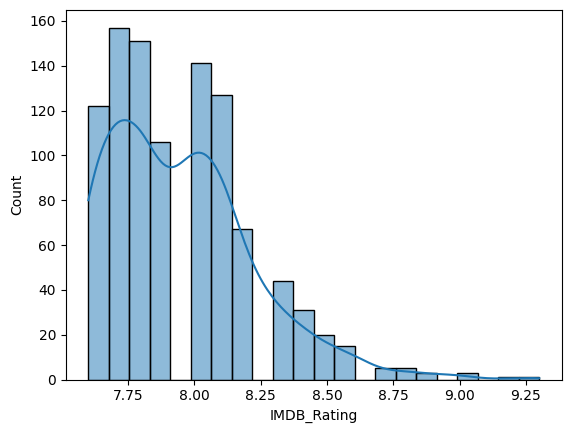

In [24]:
sns.histplot(x='IMDB_Rating',data=movie,kde=True);

8. What type of Genre has the highest IMDB rating?

Drama


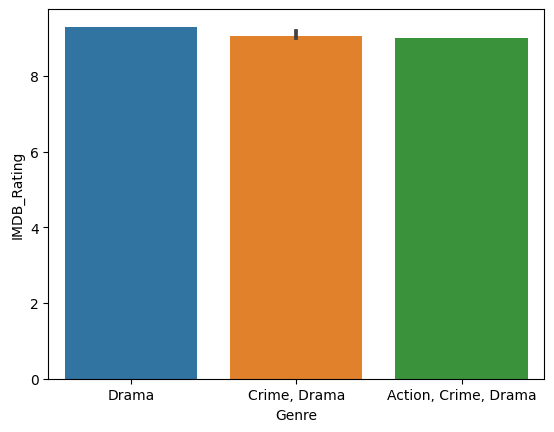

In [25]:
temp = movie.sort_values('IMDB_Rating',ascending=False).head(5)

print(temp.loc[temp.index[0],'Genre'])

sns.barplot(y='IMDB_Rating',x='Genre',data=temp);

9. Name the top 5 movies that have earned highest Meta score. 

Series_Title
Sweet Smell of Success    100.0
Rear Window               100.0
Casablanca                100.0
Trois couleurs: Rouge     100.0
Notorious                 100.0
Name: Meta_score, dtype: float64


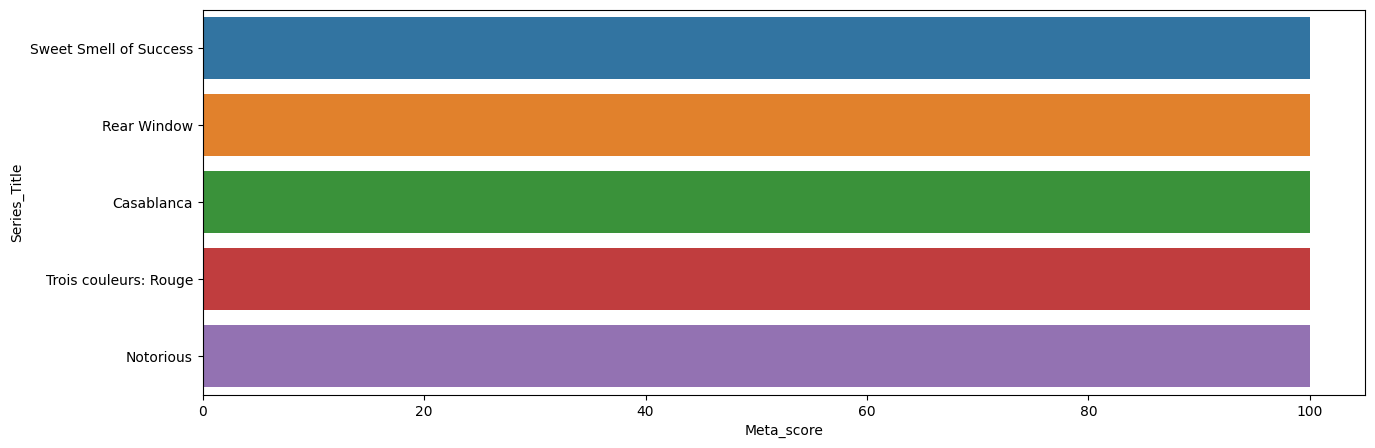

In [26]:
meta = movie.Meta_score.sort_values(ascending=False).head(5)
print(meta)
plt.figure(figsize=(15,5))
sns.barplot(x=meta,y=meta.index);

10. Of which Genre movie has the highest Runtime?

Action, Comedy, Crime


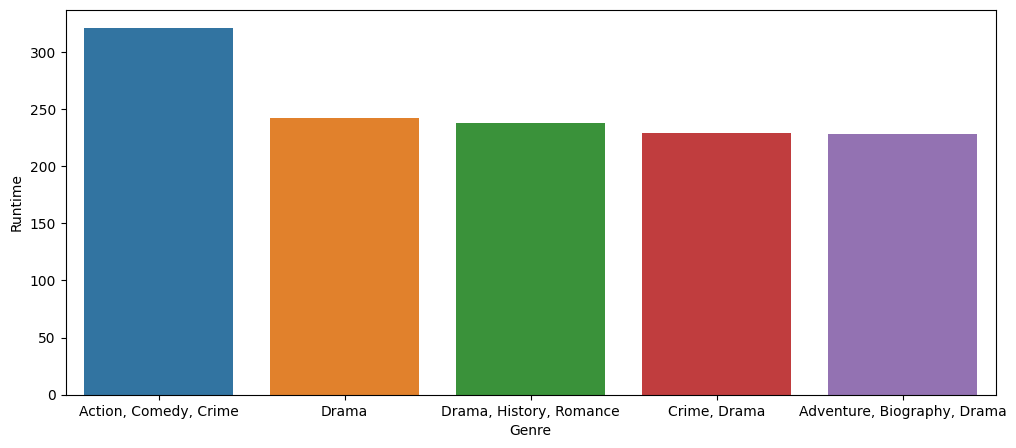

In [27]:
temp = movie.sort_values('Runtime',ascending=False).head(5)
print(temp.Genre[0])
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='Runtime',data=temp);

**Using the knowledge about Plotly that you have  try making plots and analyse the data .Whenever you come across an interesting analysis please show the corresponding plot(using Plotly) and comment down your analysis for the same**

In [61]:
new_movie = movie.dropna()
nw = new_movie.Gross.str.replace(',','').astype(int)
new_movie = new_movie.assign(Gross=nw)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Series_Title,,,,,,,,,,,,,,
The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [113]:
import plotly.graph_objects as go

px.scatter(new_movie,x=['Gross'],y='Released_Year',color='Certificate')

                                  Released Year vs Gross Collection

Analysis:
1. No. of movies made is increasing with year.
2. We see Certificate affecting the gross collection.
3. 'UA' has more films with large gross collection compared to other certificates.
4. As Certificate affects the no. of audience which affects the gross collection.

In [173]:
Gross_Mean = new_movie.groupby('Released_Year').Gross.mean()
IMDB_Rating_Mean = new_movie.groupby('Released_Year').IMDB_Rating.mean()
Meta_score_Mean = new_movie.groupby('Released_Year').Meta_score.mean()
new1 = pd.concat([Gross_Mean,IMDB_Rating_Mean,Meta_score_Mean],axis=1)
new1.reset_index(level=0,inplace=True)

In [174]:
px.line(new1,y='Meta_score',x='Released_Year')

In [131]:
px.scatter(new_movie,x='Meta_score',y='IMDB_Rating',color='Released_Year')

In [93]:
px.line(new1,y='Gross',x='Released_Year')

                              Boom in gross collection of movies in 1939

Analysis:
 1. Average Gross collection of a movie is increasing with the year.
 2. This graph shows that movies are generating more revenue now as compared to past.
 3. This is due to increase in inflation and reach of cinema.
 4. But in 1939, we see peak in gross collection where Average movie gross collection is $ 70.11 million
 5. If we adjust it for inflation the gross will be $ 1271 Million(in 2018) which is 6 times greater than gross collection in 2018( $216 Million).
 6. 1939 is considered "Hollywood’s Golden Year".

In [94]:
px.line(new1,y='IMDB_Rating',x='Released_Year')

                                    Average IMDB_Rating vs Released_Year
Analysis: 
1. This graph shows that Average IMDB Rating is Decreasing year by year. 
2. Initially we see large fluctuation in the rating (As no. of movies was less before)
3. Then we see rating slowing decreasing and Fluctuation are also becoming smaller as year progress.

In [115]:
px.pie(new_movie,values='Gross',names='Certificate',title='gross value',color_discrete_sequence=px.colors.sequential.RdBu_r)

                                     Sum of Gross value vs certificate

 Analysis:
 1. Certificate does affect how much gross collection movie collected. 
 2. UA(38.1%),U(30.7%),A(20.6%) have high gross value colletion as compared to others.
 3. As certificate affects the reach of movie or No. of audience has thus affecting the gross collection.


In [126]:

px.bar(new_movie.groupby('Certificate').Meta_score.mean().sort_values().reset_index(),y='Meta_score',x='Certificate')


                                Average Meta Score vs Certifcate

Analysis:
1. This shows that Certificate does not affect Meta_score that much.
2. Meta score is a weighted average of reviews from top critics and publications for a given movie from 1 to 100.
3. This graph shows that top critics reviews does get affect by 'Certificate' of the movie.


In [172]:
px.bar(new_movie.groupby('Certificate').IMDB_Rating.mean().sort_values().reset_index(),y='IMDB_Rating',x='Certificate')

                                   Average IMDB Rating vs Certificate

Analysis: 
1. This shows that Certificate does not affect the IMDB_Rating that much. 
2. Their is only slight variation in IMDB_Rating.